The data set comprises several sensor data collected from a permanent magnet synchronous motor (PMSM) deployed on a test bench.

*   
According to the Dataset Given, the most interesting target features can be  rotor temperature ("pm"), stator temperatures, torque and Motor speed because they are not reliably and economically measurable in a commercial vehicle.
*   Being able to have strong estimators for the rotor and stator temperature helps the automotive industry to manufacture motors with less material and enables control strategies to utilize the motor to its maximum capability.

*   A more accurate and appropriate torque estimate leads to more accurate and adequate motor control, decreasing power losses and, eventually, heat build-up.









In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Target feature variables are as following :**  

1.   Stator winding temperature (stator_winding)
2.   Stator tooth temperature (stator_tooth)
3.   Stator yoke temperature (stator_yoke)
4.   Torque (torque)
5.   Rotor temperature (pm)

**These are the outputs of the model which accepts the following as the input features:**

1.   Voltage q-component (u_q)
2.   Voltage d-component (u_d)
3.   Current d-component (i_q)
4.   Current q-component (i_d)
5.   Coolant temperature (coolant)
6.   Ambient temperature (ambient)







In [2]:
import numpy as np
import pandas as pd
import time

# data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# model selection and building libraries
from sklearn.model_selection import train_test_split 

RANDOM_STATE = 21

**Load the dataset**

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/DL_Project/measures_v2.csv')

In [4]:
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


**Discription of dataset**

In [5]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


In [6]:
df.shape

(1330816, 13)

**Let's rearrange the columns and rename them for better understanding**

In [7]:
new_columns = [
    'u_q', 
    'u_d', 
    'i_q',
    'i_d',
    'coolant',
    'ambient',
    'pm',
    'stator_winding',  
    'stator_tooth',  
    'stator_yoke',
    'motor_speed',
    'torque',
    'profile_id']

df = df[new_columns]
print('Dataframe with columns in new order:')
df.head(1)

Dataframe with columns in new order:


,u_q,u_d,i_q,i_d,coolant,ambient,pm,stator_winding,stator_tooth,stator_yoke,motor_speed,torque,profile_id
0,-0.450682,-0.350055,0.000328,0.004419,18.805172,19.850691,24.554214,19.08667,18.293219,18.316547,0.002866,0.187101,17


**Data Exploratory analysis**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   u_d             1330816 non-null  float64
 2   i_q             1330816 non-null  float64
 3   i_d             1330816 non-null  float64
 4   coolant         1330816 non-null  float64
 5   ambient         1330816 non-null  float64
 6   pm              1330816 non-null  float64
 7   stator_winding  1330816 non-null  float64
 8   stator_tooth    1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  motor_speed     1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [9]:
# check duplicates and drop if exist
duplicate_r = df[df.duplicated().values == True]
print(f'Number of duplicates: {len(duplicate_r)}')

Number of duplicates: 0


**Visualization of data**

**Sample size plot**

The data set consists of multiple measurement sessions, which can be distinguished from each other by column "profile_id".

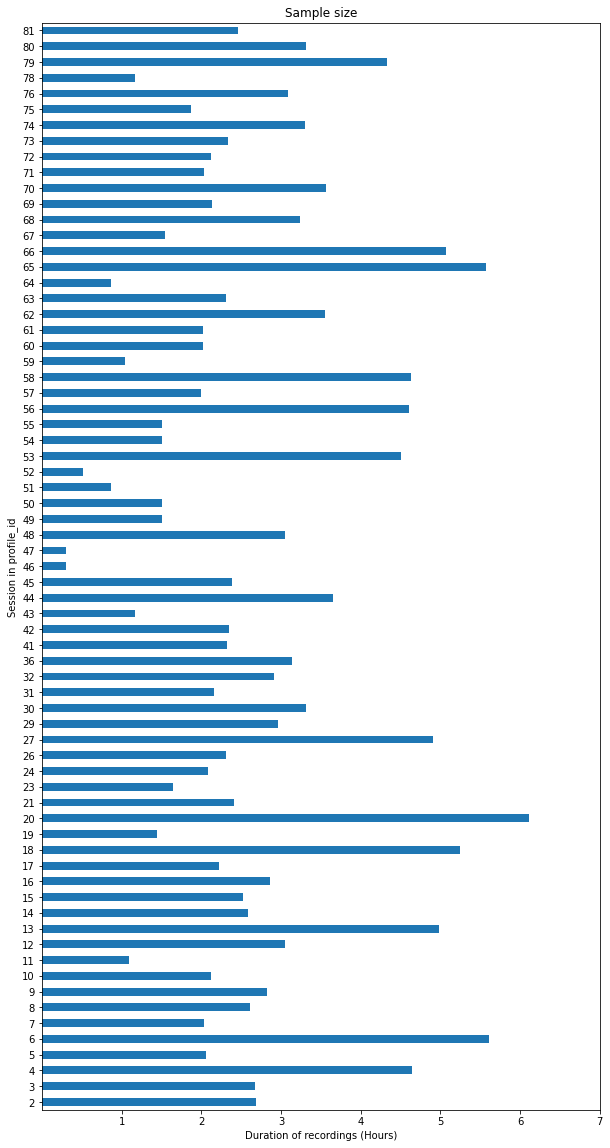

In [18]:
counts = df.groupby('profile_id')['pm'].agg('count')              #profile_id gives us sessions
ax = counts.plot.barh(figsize=(10, 20), title='Sample size')
_ = ax.set_xticks(2*3600*np.arange(1, 8))                         # 2Hz sample rate
_ = ax.set_xticklabels(list(range(1, 8)))
_ = ax.set_xlabel('Duration of recordings (Hours)')
_ = ax.set_ylabel('Session in profile_id')

The plot shows that all the sessions range b/w 20 mins to around 6 hours apart from sessions '46' and '47'. 

**Sample distribution across hours of recordings**

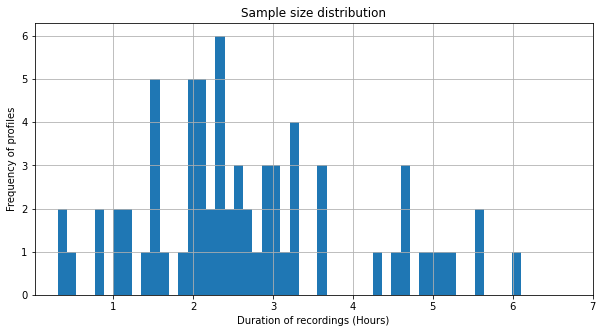

In [19]:
ax = counts.plot.hist(title='Sample size distribution', bins=50, figsize=(10, 5), grid=True)
_ = ax.set_xticks(2*3600*np.arange(1, 8))                                                         # 2Hz sample rate
_ = ax.set_xticklabels(list(range(1, 8)))
_ = ax.set_xlabel('Duration of recordings (Hours)')
_ = ax.set_ylabel('Frequency of profiles')

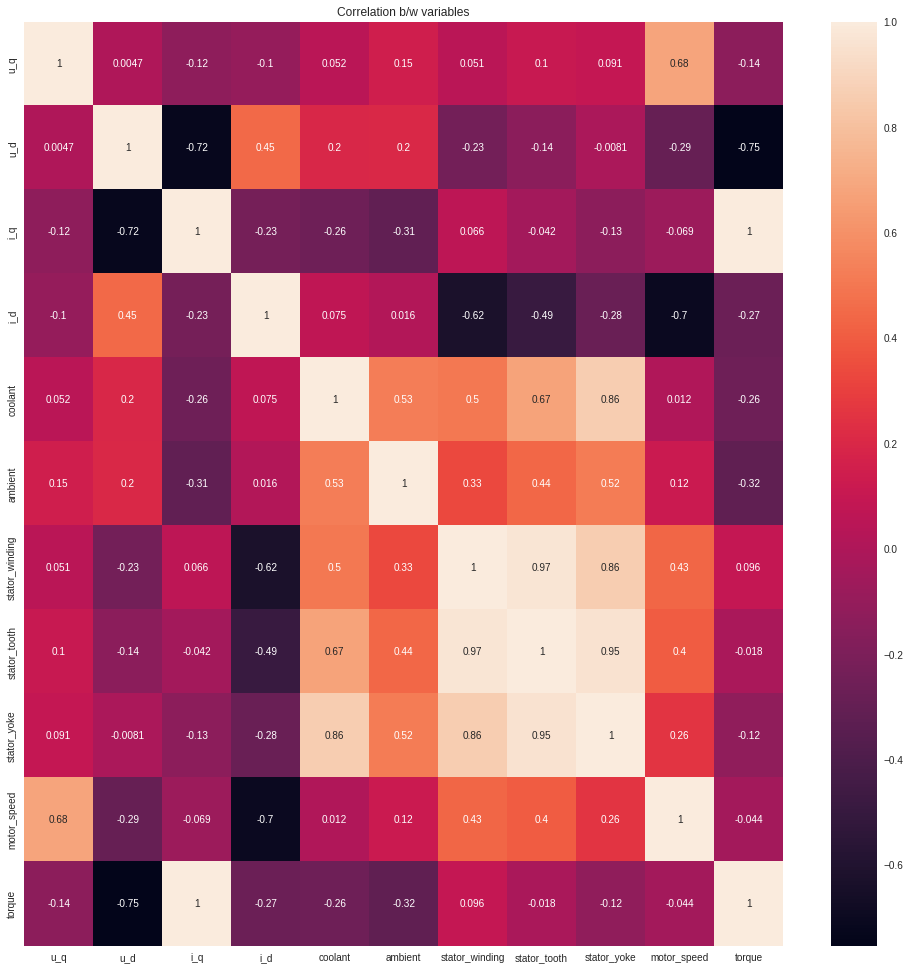

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(17,17))

# show a heatmap of the column variables
plt.title('Correlation b/w variables')
sns.heatmap(data=df.corr(), annot=True)

**Observations:** As Per the ploted heatmap we can say that - 



*   stator_tooth, stator_winding and stator_yoke are correlated between themselfs 

*   torque has the maximum correlation coeff 1 with i_q, and strong negative correlation with u_d

*   motor_speed has strong positive correlation with u_q and strong negative correlation with i_d
*   stator_yoke is significantly correlated with coolant and less significantly with ambient


*   stator_tooth and stator_winding have positive correlation with coolant and negative correlation with i_d


*   i_q and u_d have strong negative correlation









**Explore highly co-rrelated relationships**

1.   torque and i_q has  maximum correlation coeff 1



Text(0, 0.5, 'Current q-component')

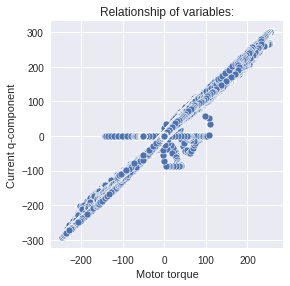

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(data=df, x='torque', y='i_q', ax=ax)
plt.title( f'Relationship of variables:')
plt.xlabel("Motor torque")
plt.ylabel('Current q-component')




2. stator_tooth, stator_winding - 0.97
3. stator_tooth, stator_yoke    - 0.95
4. stator_winding, stator_yoke  - 0.86 


Text(0, 0.5, 'Stator yoke temperature')

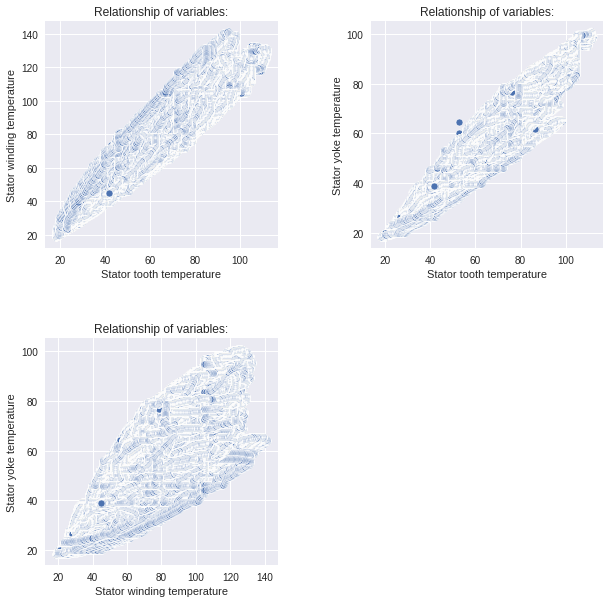

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

#Plot 1
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(data=df, x='stator_tooth', y='stator_winding', ax=ax)
plt.title( f'Relationship of variables:')
plt.xlabel('Stator tooth temperature')
plt.ylabel('Stator winding temperature')

#Plot 2
ax = fig.add_subplot(2, 2, 2)
sns.scatterplot(data=df, x='stator_tooth', y='stator_yoke', ax=ax)
plt.title( f'Relationship of variables:')
plt.xlabel('Stator tooth temperature')
plt.ylabel('Stator yoke temperature')

#Plot 3
ax = fig.add_subplot(2, 2, 3)
sns.scatterplot(data=df, x='stator_winding', y='stator_yoke', ax=ax)
plt.title( f'Relationship of variables:')
plt.xlabel('Stator winding temperature')
plt.ylabel('Stator yoke temperature')

5. i_q and u_d have strong negative correlation

Text(0, 0.5, 'Current q-component')

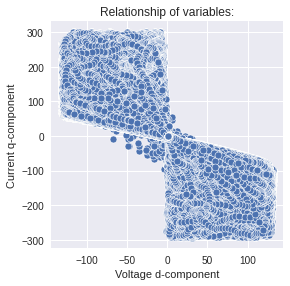

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

#Plot 1
ax = fig.add_subplot(2, 2, 1)
sns.scatterplot(data=df, x='u_d', y='i_q', ax=ax)
plt.title( f'Relationship of variables:')
plt.xlabel('Voltage d-component')
plt.ylabel('Current q-component')

**Let's Plot 3D graphs exploring relationships b/w 3 variables**



1.   torque has the maximum correlation coeff 1 with i_q and strong negative correlation with u_d
2.   stator_tooth, stator_winding and stator_yoke are correlated between themselfs

3.   stator_yoke is significantly correlated with coolant and less significantly with ambient






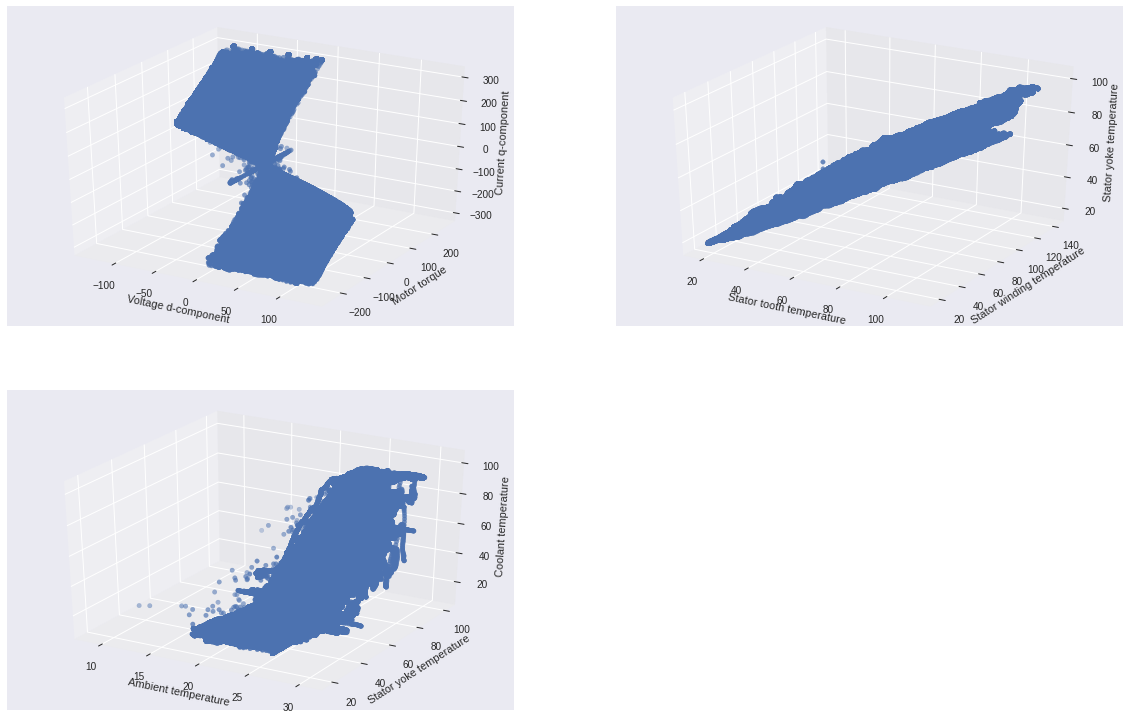

In [ ]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# First subplot

ax = fig.add_subplot(3, 2, 1, projection='3d')
ax.set_xlabel('Voltage d-component')
ax.set_ylabel('Motor torque')
ax.set_zlabel('Current q-component')

x = df['u_d']
y = df['torque']
z = df['i_q']

ax.scatter(x, y, z)

# First subplot

ax = fig.add_subplot(3, 2, 2, projection='3d')
ax.set_xlabel('Stator tooth temperature')
ax.set_ylabel('Stator winding temperature')
ax.set_zlabel('Stator yoke temperature')

x = df['stator_tooth']
y = df['stator_winding']
z = df['stator_yoke']

ax.scatter(x, y, z)

# First subplot

ax = fig.add_subplot(3, 2, 3, projection='3d')
ax.set_xlabel('Ambient temperature')
ax.set_ylabel('Stator yoke temperature')
ax.set_zlabel('Coolant temperature')

x = df['ambient']
y = df['stator_yoke']
z = df['coolant']

ax.scatter(x, y, z)

As per the graphs we can say that,


> Motor torque has linear dependence upon i_q and u-d components




> stator tooth, stator winding and stator yoke are highly dependent between themselvs

> stator yoke has non linear relationship with ambient and coolant temperature





**Distribution of independent variables**



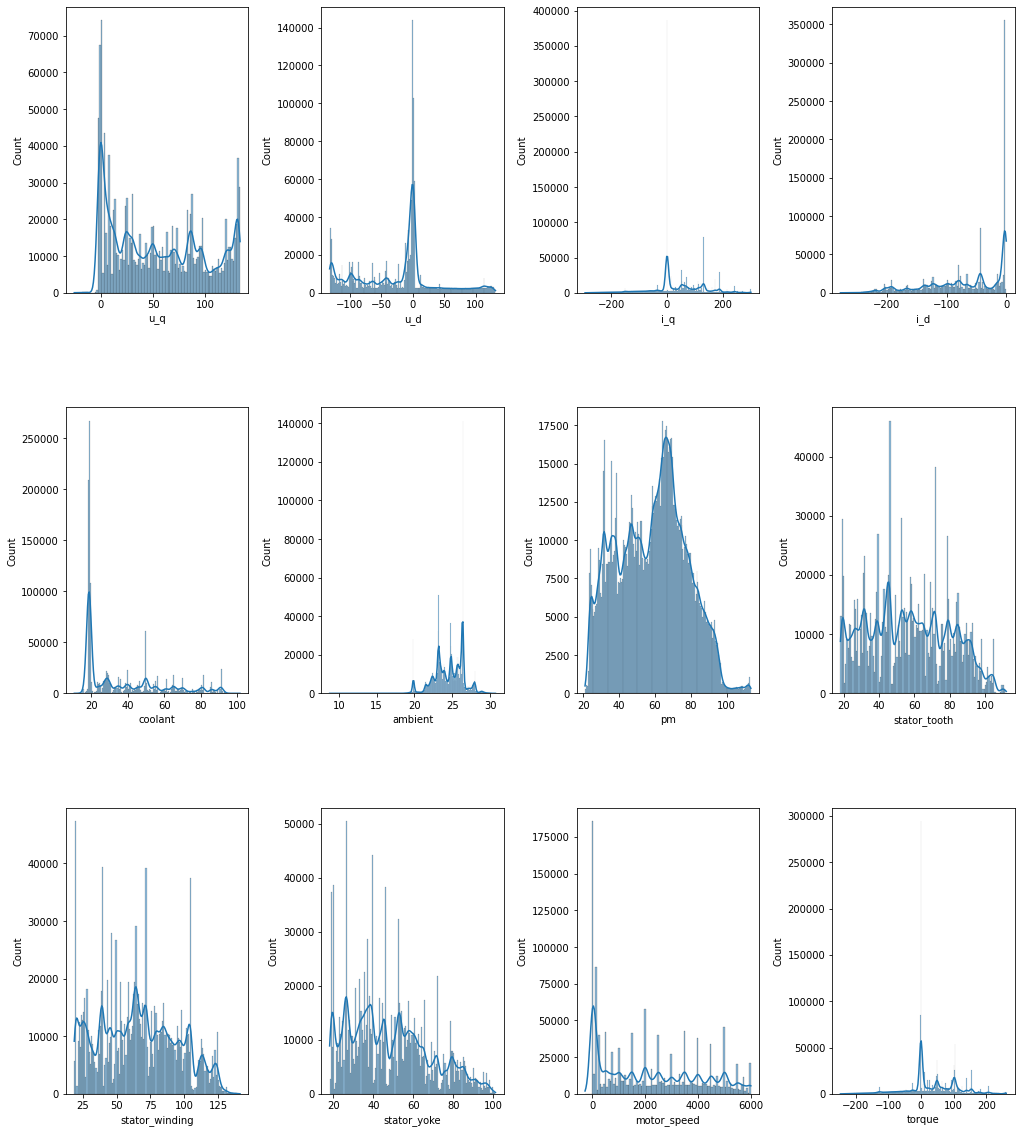

In [23]:
fig = plt.figure(figsize=(17,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(3, 4, 1)
sns.histplot(data=df, x='u_q', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 2)
sns.histplot(data=df, x='u_d', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 3)
sns.histplot(data=df, x='i_q', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 4)
sns.histplot(data=df, x='i_d', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 5)
sns.histplot(data=df, x='coolant', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 6)
sns.histplot(data=df, x='ambient', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 7)
sns.histplot(data=df, x='pm', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 8)
sns.histplot(data=df, x='stator_tooth', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 9)
sns.histplot(data=df, x='stator_winding', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 10)
sns.histplot(data=df, x='stator_yoke', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 11)
sns.histplot(data=df, x='motor_speed', kde=True, ax=ax)

ax = fig.add_subplot(3, 4, 12)
sns.histplot(data=df, x='torque', kde=True, ax=ax)

plt.show()



*   Input features show a significant spike in their distribution. This is reasonable as these are the values that are held during no excitation (resting/cooldown phase)
*   
target variable  temperatures are less spikey, indicating a slower progress or response to input features (read 'greater time constants'). 

*   for input features we can observe that zero value appears most frequently in columns representing coordinates for current and voltage.Coolant and ambient are measured in the same units and the highest peak of coolant is at the value 20 and the highest peak of of ambient is at the value 26.








**Let's check for the outliers for our input variables**

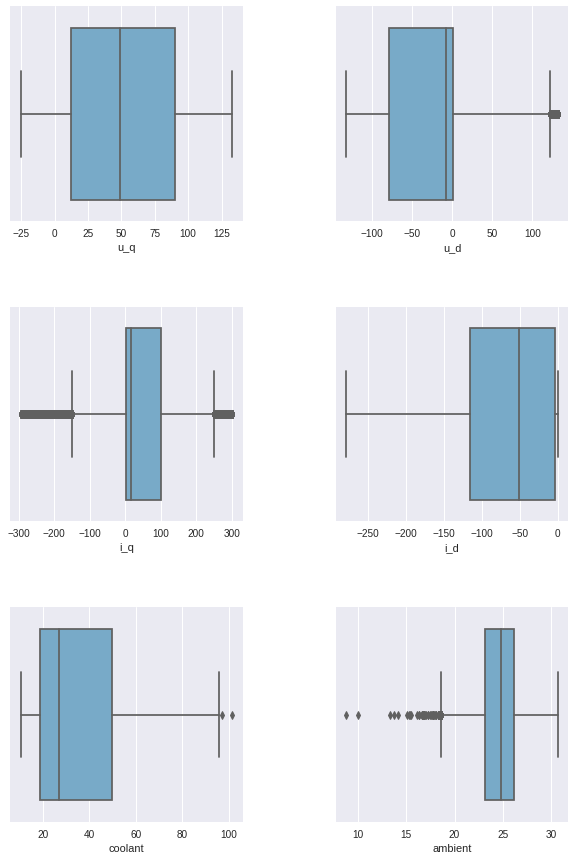

In [ ]:
fig = plt.figure(figsize=(10,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(3, 2, 1)
sns.boxplot(x=df['u_q'], palette='Blues', ax=ax)

ax = fig.add_subplot(3, 2, 2)
sns.boxplot(x=df['u_d'], palette='Blues', ax=ax)

ax = fig.add_subplot(3, 2, 3)
sns.boxplot(x=df['i_q'], palette='Blues', ax=ax)

ax = fig.add_subplot(3, 2, 4)
sns.boxplot(x=df['i_d'], palette='Blues', ax=ax)

ax = fig.add_subplot(3, 2, 5)
sns.boxplot(x=df['coolant'], palette='Blues', ax=ax)

ax = fig.add_subplot(3, 2, 6)
sns.boxplot(x=df['ambient'], palette='Blues', ax=ax)

plt.show()



> From the plots we can say that coolant, ambient, i_q and u_d have some outliers.



**Split data into training and testing samples**


> 
The model should be trained with 75% of the available data, while remaining 25% of the dataset should be used for model testing.



In [ ]:
data_set = df

training_set, testing_set = train_test_split(
    data_set, test_size = 0.25, random_state = RANDOM_STATE, shuffle=True)
testing_set.shape

(332704, 11)